<a href="https://colab.research.google.com/github/joshjarvey/intro_to_tensorflow/blob/master/CNN_MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
dataset = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = dataset.load_data()

class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nLoss is low, training cancelled.")
      self.model.stop_training = True

callbacks = myCallBack()

training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
       ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'] 
             )

4423680/4422102 [==============================] - 0s 0us/step
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [2]:
model.fit(training_images, training_labels, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.4337 - acc: 0.8412
Epoch 2/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.2920 - acc: 0.8927
Epoch 3/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.2490 - acc: 0.9080
Epoch 4/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.2153 - acc: 0.9191
Epoch 5/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.1868 - acc: 0.9301
Epoch 6/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.1630 - acc: 0.9384
Epoch 7/10
60000/60000 [==============================] - 12s 197us/sample - loss: 0.1442 - acc: 0.9454
Epoch 8/10
60000/60000 [==============================] - 12s 195us/sample - loss: 0.1286 - acc: 0.9518
Epoch 9/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.1122 - acc: 0.9580
Epoch 10/10
60000/60000 [==============================] - 12s 1

In [3]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 99us/sample - loss: 0.3094 - acc: 0.9098


[0.3094024258464575, 0.9098]

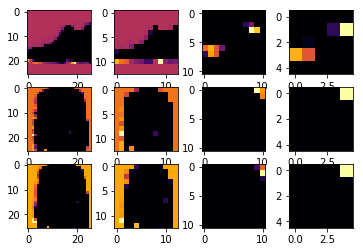

In [4]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)